# Trabalho Final

Neste trabalho final você irá pôr em prática todas as etapas exercitadas ao longo da mentoria sobre projetos de aprendizado de máquina em uma tarefa de classificação de NLP: detecção de sarcasmo. Segundo Yaghoobian et al:

    “Sarcasm detection is the task of identifying irony containing utterances in sentiment-bearing text. However, the figurative and creative nature of sarcasm poses a great challenge for affective computing systems performing sentiment analysis.”

 

Detecção de sarcasmo é uma tarefa com muitas aplicações práticas interessantes,  mas também é extremamente desafiadora. Padrões linguísticos e sociais que categorizam o sarcasmo podem não estar contido unicamente no texto ou no uso de palavras específicas, dificultando que algoritmos de aprendizado de máquina aprendam a generalizar. Nesse contexto, foi proposto por Khodak et al o dataset SARC, coletado da plataforma Reddit:


    “We introduce the Self-Annotated Reddit Corpus (SARC), a large corpus for sarcasm research and for training and evaluating systems for sarcasm detection. The corpus has 1.3 million sarcastic statements -- 10 times more than any previous dataset -- and many times more instances of non-sarcastic statements, allowing for learning in both balanced and unbalanced label regimes. Each statement is furthermore self-annotated -- sarcasm is labeled by the author, not an independent annotator -- and provided with user, topic, and conversation context.”


Em anexo, encontra-se uma amostra do SARC. Dado esse contexto, você deverá criar e validar um modelo de detecção de sarcasmo utilizando esse dataset. O trabalho deverá conter:


    Análise exploratória

        Mostre exemplos de cada classe.

        Crie pelo menos 5 gráficos, contendo um que mostre o balanceamento entre as classes. Sugestões de outros gráficos: termos mais frequentes em cada classe, distribuição da quantidade de palavras em cada classe.

        Discuta seus achados.


    Aprendizado não-supervisionado

        Qualquer técnica pode ser utilizada, clusterização ou redução de dimensionalidade. Pode-se usar parte da análise exploratória ou como auxiliar na classificação.


    Limpeza e pré-processamento dos dados

        Pelo menos 3 técnicas de pré-processamento de texto (que já não sejam utilizadas por padrão na vetorização)

        Utilize alguma técnica de balanceamento de dados


    Engenharia de atributos

        Selecione dentre os dados disponíveis quais devem ser utilizados como atributos de entrada e o método para representação vetorial.

        Utilize pelo menos dois conjuntos de atributos de entrada, comparando as performances. Justifique suas escolhas.


    Estabelecimento de um baseline

        Utilize um modelo simples, não faça otimização de hiperparâmetros. Justifique sua escolha.


    Seleção e avaliação de modelos

        Escolha uma ou mais métricas de desempenho apropriadas para esta tarefa.

        Utilize pelo menos 4 algoritmos, realizando a otimização de hiperparâmetros. Destes modelos, ao menos um deve ser um algoritmos deve ser um que não foi visto durante a mentoria. Estude o funcionamento dele. Sugestão: modelo de Deep Learning.

        Avalie os algoritmos com hiperparâmetros otimizados no conjunto de teste.


    Análise de resultados

        Mostre exemplos dos erros (falso positivos e falso negativos) para o melhor dos algoritmos experimentados.

        Discuta os resultados e aponte quais seriam possíveis melhorias


    (OPCIONAL) Interpretabilidade

        Utilize algum método que permita uma interpretação das predições de algum dos seus modelos.


    (OPCIONAL) Deploy

        Implemente uma API para que o seu melhor modelo possa ser utilizado via requisições HTTP.

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

Primeiramente, alterando as configurações do dataframe para que ele exiba os textos completos, e logo em seguida imprimindo o dataframe para realizar sua análise.

In [98]:
pd.set_option("display.max_colwidth", None)
df = pd.read_csv('sarc_sample.csv')
df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,1,"Of course, just like 3.2 was the true Messiah.",ReticentHedgehog,ffxiv,1,1,0,2016-05,2016-05-02 20:20:37,"Is patch 3.3 going to be our savior? Without trying to sound like a broken record and repeating the many point of views of the growing apocalyptic threads on this forum. I was hoping to get the opinions of everyone if they believe patch 3.3 is going to bring back some of the players who have quit in the last patch or two, or does this feel like another cookie cutter patch that wont stop exit of quality population specifically on the North American servers. I ask this in concern that I have made a assertive effort as of late to refill our FC, and one of the strong points of the patch info so far is that they are installing a cross realm raid tool, which seems like it would diminish the need to recruit for a FC. I personally enjoy the aspect of a 10-15 member FC which can grow close and share things in common to the game and outside the game. But with the game seemingly losing subs it has become harder to find people to come together like I had just described and I don't want to put false hope in those who I have recruited so far. Give me some hope!"
1,1,"Yeah because Iran was 100% muslim prior to 1979, and still is now.",methmobile,worldnews,-3,-1,-1,2016-12,2016-12-30 10:21:31,I suggest you research Iran pre-1979 as well as al-Qatb and the rise of Wahhabism. You are fully entitled to have an opinion and express it (and you do bring up a good point re: rural cobservatism) but you are misinformed.
2,1,WELL YOU'RE JUST A BITCH...YOU HAVE TO GO AND POST AND TAKE YOUR DOWNVOTES,dillydelly,nba,1,1,0,2014-05,2014-05-04 08:02:30,"Warriors / Clips game threads literally add zero value to the game experience. Why would I want to see the words flop, flopped and flopper repeated constantly? Thunder / Clips game threads were pretty good during the season. We'll see how the playoff ones are."
3,1,"Yeah, it's dumb to run background checks on potential teachers.",Krenolds,AskReddit,1,1,0,2014-09,2014-09-02 08:09:10,"Oh i forgot.., you get to be finger printed when you are hired! Awesome!"
4,1,"Oh, it's not that bad once you get a handle on the crippling depression and constant tooth grinding.",ericanderton,AskReddit,4,4,0,2011-08,2011-08-24 13:17:20,Haha oh. Definitely not an option than.
...,...,...,...,...,...,...,...,...,...,...
59995,0,"room you mean like, dimension?",Tikikala,digimon,1,1,0,2016-03,2016-03-26 03:42:22,"So as another guy pointed out. Huckmon might be projecting Ken as a way to steal Meicoomon, remember he was lurking all the time. Also he was in the 'room' after Ken disappeared"
59996,0,I wasn't too fond of grabner in 14 so I put Bergeron up the middle to win draws and set up plays and what not.,mrhairybolo,hockey,1,1,0,2014-08,2014-08-10 05:57:31,Hall - Duchene - Grabner?
59997,0,he wasn't even at worlds in season 4!,Highstalker,leagueoflegends,-1,-1,0,2016-09,2016-09-19 14:41:23,Yeah he was.
59998,0,"Right, but the Trump sign...",gcbeehler5,pics,2,2,0,2016-09,2016-09-01 02:14:54,I wouldn't say you have to be liberal to appreciate sustainability. You just have to not be an ignorant twat.


# Análise exploratória

Esta etapa visa analisar o conjunto de dados para entender melhor seu desempenho e os seus futuros resultados. Para isso, iremos analisar alguns gráficos que trazem informações importantes para a classificação dos dados. Primeiramente, trouxe a baixo 4 exemplos de cada classe, conforme orientado na descrição da atividade.

In [99]:
um = df['label'] == 1
df[um].sample(n = 4)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
23187,1,Sora confirmed!,Slade712,smashbros,1,1,0,2014-09,2014-09-09 20:58:37,Looks like a Keyblade.
23344,1,Pffft that's easy fallout 4,tabascotazer,AskReddit,1,1,0,2015-06,2015-06-24 20:49:01,What is your favorite video game of all time?
5711,1,"Yes, it has nothing to do with the sex part.",nomdplume,PurplePillDebate,1,1,0,2016-03,2016-03-06 08:32:45,Pornography is successful because it is readily available.
9836,1,ummm you forgot the led's,citiesandcolours,DIY,2,-1,-1,2016-10,2016-10-05 19:08:42,DIY Floating bed frame for a birthday present to my girlfriend


In [100]:
zero = df['label'] == 0
df[zero].sample(n = 4)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
56666,0,Good luck!,greengardens,Accutane,1,1,0,2016-03,2016-03-30 02:33:44,"well the birth control wasn't causing my acne, i developed acne once i got off birth control which is fairly common. my course was 5 months at 80 mg/day. my derm did call me back and she is okay with extending my course. i'm hoping since i've only been off accutane for a week that i won't have another IB"
58168,0,They come with an iPhone 6 and a pair of Beats.,Neckwrecker,nyc,5,5,0,2015-03,2015-03-10 14:23:06,what perplexes me is the ubiquity to cost ratio. How the hell is everyone and their mom able to afford these boring clone jackets?
56293,0,with open arms,Shark_Lad,The_Donald,1,1,0,2016-06,2016-06-13 19:10:49,"What's gonna happen to all the Bernie Supporters? Once he drops out where are they going to go? I heard a few are going to support Trump, are you willing to accept them?"
41972,0,Wrong.,Jordeezus,leagueoflegends,1,1,0,2015-11,2015-11-14 17:01:31,Zac passive bug.


### Etapas de pré-processamento

Para realizar a coleta de informações que seriam utilizadas nos gráficos, foi necessário antecipar a etapa de pré-processamento dos dados, as funções a baixo tem o objetivo de remover alguns tipos de caracteres que não são utéis durante a análise dos dados.

1. Primeiramente a função "remover_pontuação" faz uso de list comprehension para iterar entre os caracteres do texto e remover os caracteres que estão incluidos em "string.punctuation".

In [101]:
import string
def remover_pontuacao(text):
    sem_pontuacao="".join([i for i in text if i not in string.punctuation])
    return sem_pontuacao

2. A função "lower" tem o objetivo de deixar todas as palavras do texto em minúsculo, criando um padrão mais fácil de detectar nos caracteres. Esse passo é muito importante para realizar a remoção de stopwords, pois todas as palavras na lista de stopwords estão em letra minúscula.

In [102]:
def lower(text):
    return text.lower()

3. A função "remove_nums" utiliza regex para detectar e remover todos os números do conjunto de dados, isso é importante pois em geral caracteres numéricos não trazem muita informação, e ao retirá-los é possível diminuir bastante a quantidade de dimensões do conjunto.

In [103]:
import re
def remove_nums(text):
    num_regex = '\d+'
    t = re.sub(num_regex, '', text)
    return t

4. A função "remove_stop_words" serve para remover as stopwords do conjunto de dados. Igualmente aos caracteres númericos as stopwords não agregam muitas informações durante a análise, por isso, geralmente é benéfico fazer sua retirada, principalmente pois elas costumam se repetir muitas vezes durante os textos, assim, aumentando a quantidade de dimensões.

In [104]:
import nltk
def remove_stop_words(text):
    stopwords = nltk.corpus.stopwords.words('english')
    texto = [w for w in text.split() if w not in stopwords]
    frase = " ".join(texto)
    return frase

5. A função "lemmatizer" tem o proposito de transformar as palavras do conjunto de dados em suas formas base, com o cuidado para que elas não percam o sentido. Esse passo é importante para simplificar o texto, ajudando a extrair o máximo de informação.

In [105]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    texto = [wordnet_lemmatizer.lemmatize(word) for word in text.split()]
    frase = " ".join(texto)
    return frase

6. A função "remove_little_words" remove do conjunto de dados as palavras que possuem apenas 2 ou menos caracteres, pois essas palavras curtas aumentam consideravelmente a quantidade de dimensões do conjunto e, em geral, não trazem muitas informações, além de que na maioria das vezes se tratam de erros de digitação.

In [106]:
def remove_little_words(text):
    frase =" ".join([w for w in text.split() if len(w) > 2])
    return frase

7. A função "preprocess" é responsável por executar algumas das funções acima, facilitando o uso destas em conjunto. Na função preprocess, a ordem em que as funções são chamadas é muito importante, pois a lista de stopwords utilizada possui apenas palavras em minúsculo e com o uso correto das pontuações, logo, se retirarmos as  pontuações antes das stopwords, algumas palavras podem acabar escapando.

In [107]:
def preprocess(text):
        text = remove_nums(text)
        text = lower(text)
        text = remove_stop_words(text)
        text = remover_pontuacao(text)
        text = remove_little_words(text)
        text = lemmatizer(text)
        return text

## Gráficos

### 1° Gráfico

Primeiramente temos o gráfico da quantidade de itens de cada classe. É possível reparar que existem muito mais itens na classe "1" do que na classe "0", isso significa que esse é um conjunto de dados desbalanceado, e futuramente precisaremos utilizar algumas tecnicas para realizar o seu balanceamento

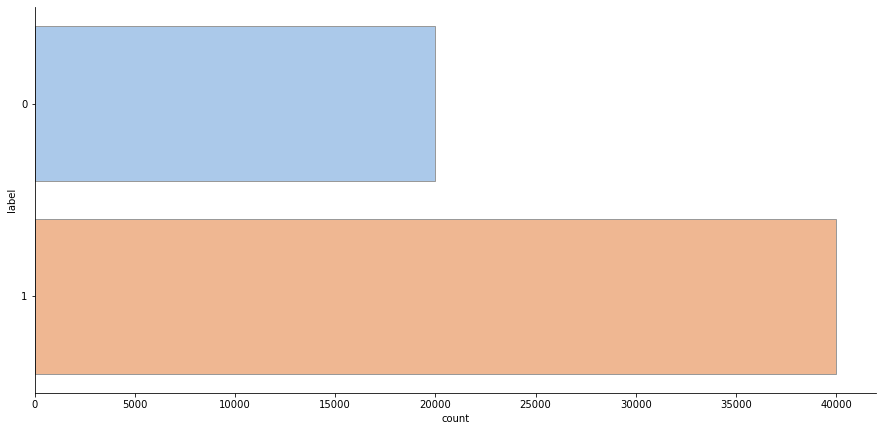

In [108]:
# Gráfico do balanceamento entre as classes
sns.catplot(y="label", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
plt.gcf().set_size_inches(13, 6)

### 2° Gráfico

O segundo gráfico mostra as 10 palavras que mais se repetiram nos comentários classificados na classe "1", que seriam os comentários sarcásticos.

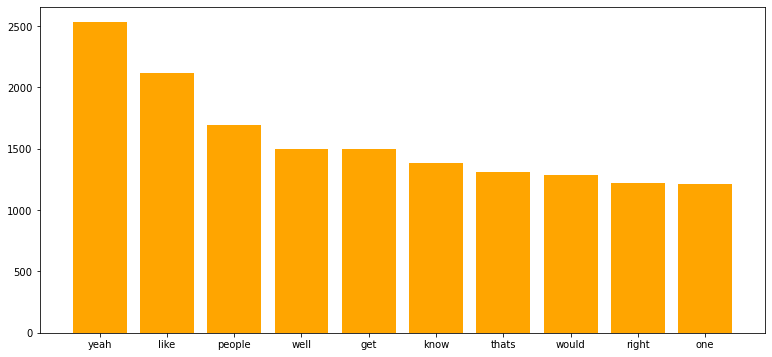

In [109]:
# Gráfico das palavras que aparecem com mais frequência na classe 1
from nltk import word_tokenize
from nltk import FreqDist
from matplotlib.pyplot import figure
q = df[um]
q = q.comment.explode().to_frame().reset_index(drop=True)
P=' '.join([str(w) for w in q['comment']])
P = preprocess(P)
P = FreqDist(word_tokenize(P))

figure(figsize=(13, 6))
x, y = zip(*P.most_common(n=10))
plt.bar(range(len(x)), y, color='orange')
plt.xticks(range(len(x)), x)
plt.show()

### 3° Gráfico

No terceiro gráfico, temos as 10 palavras mais frequentes nos comentários classificados na classe "0". Comparando com as palavras obtidas no gráfico anterior podemos observar muitas similaridades, porém, é interessante perceber que a palavra "yeah", que foi a que mais apareceu na classe "1", não chegou a aparecer nem no top 10 da classe "0", ou seja, essa palavra é muito mais utilizada em frases sarcásticas.

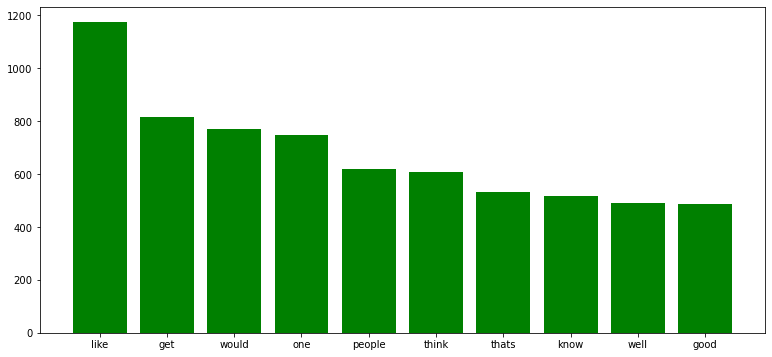

In [110]:
# Gráfico das palavras que aparecem com mais frequência na classe 0
q2 = df[zero]
q2 = q2.comment.explode().to_frame()
P2=' '.join([str(w) for w in q2['comment']])
P2 = preprocess(P2)
P2 = FreqDist(word_tokenize(P2))

figure(figsize=(13, 6))
x, y = zip(*P2.most_common(n=10))
plt.bar(range(len(x)), y, color='green')
plt.xticks(range(len(x)), x)
plt.show()

### 4° Gráfico

Na figura a seguir, podemos ver um gráfico da quantidade de comentários que foram coletados para esse conjunto de dados em cada data(mês/ano). É possível perceber que em todas as datas, a quantidade de comentários sarcásticos coletados sempre foi maior, e em dezembro de 2016 foi coletada a maior quantidade de amostras. Nesse caso é importante observar a data das amostras, pois o contexto da época acaba influênciando nos comentários, e isso ajuda a identificar o que pode ser sarcástico ou não.

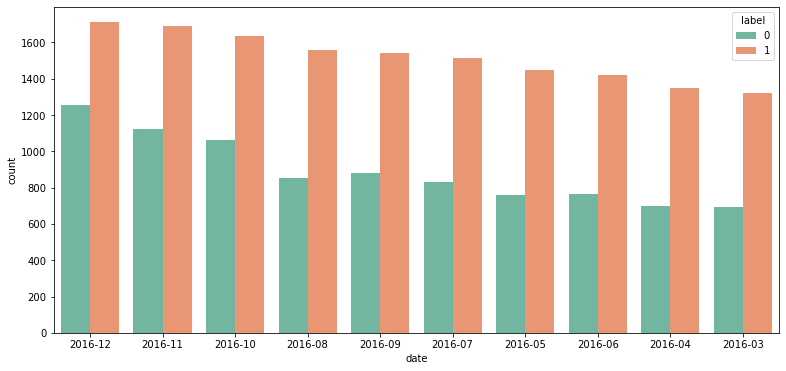

In [111]:
q = df[um]
q = q.date.explode().to_frame().reset_index(drop=True)
P3=' '.join([str(w) for w in q['date']])
P3 = FreqDist(word_tokenize(P3))
c1 = P3.most_common(n=10)
dd = pd.DataFrame(c1, columns = ['date', 'count'])

q2 = df[zero]
q2 = q2.date.explode().to_frame()
P4=' '.join([str(w) for w in q2['date']])
P4 = FreqDist(word_tokenize(P4))
c2 = P4.most_common(n=10)
dd2 = pd.DataFrame(c2, columns = ['date', 'count'])

dd['label'] = 1
dd2['label'] = 0

dd3 = pd.concat([dd, dd2], axis=0)
ax = sns.barplot(x="date", y="count", hue="label", palette="Set2", data=dd3)
plt.gcf().set_size_inches(13, 6)

### 5° Gráfico

No último gráfico, podemos observar uma comparação entre a distribuição da quantidade de caracteres dos comentários das duas classes.

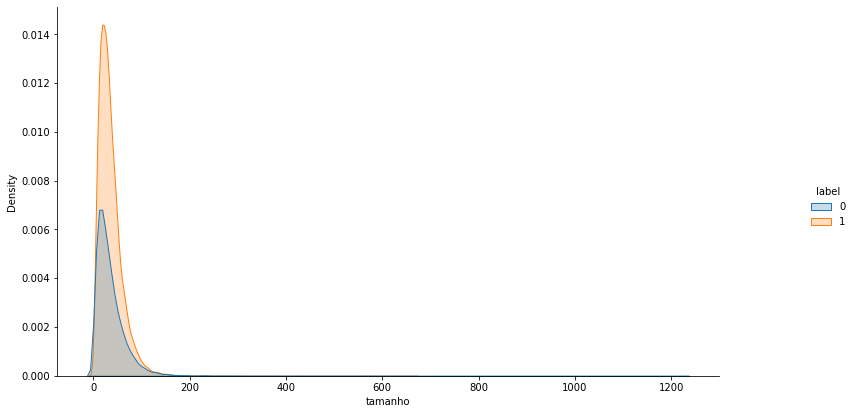

In [112]:
df['comment'] = df['comment'].astype('str')
lista = []
for i in df['comment']:
    f = preprocess(i)
    lista.append(f)
    
dc = pd.DataFrame (lista, columns = ['comment'])
label = df['label']
df_dc = pd.concat([dc, label], axis=1)
df_dc['tamanho']= dc['comment'].apply(len)
sns.displot(df_dc, x="tamanho", hue="label", kind="kde", fill=True)
plt.gcf().set_size_inches(13, 6)

### Gráficos extras

Os dois gráficos a seguir mostram os 10 bigramas mais frequentes em cada classe. É possível perceber uma grande variação entre os dois gráficos, mostrando que certas junções de palavras são muito mais utilizados em frases sarcásticas, como por exemplo "sound like", que embora apareça tanto em palavras sarcasticas quanto não sarcasticas, é predominantemente usado em contexto sarcástico.

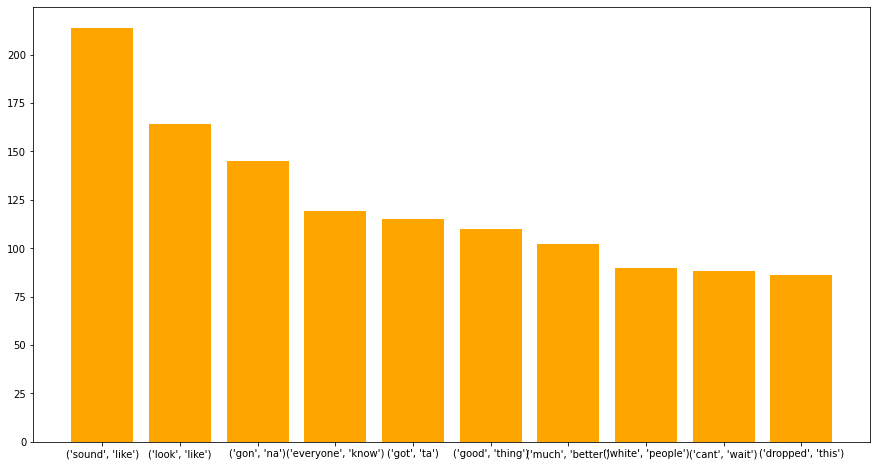

In [113]:
# Gráfico dos bigramas que aparecem com mais frequência na classe 1
from nltk import bigrams
q = df[um]
q = q.comment.explode().to_frame().reset_index(drop=True)
P=' '.join([str(w) for w in q['comment']])
P = preprocess(P)
P = word_tokenize(P)
P = list(bigrams(P))
P = FreqDist(P)

figure(figsize=(15, 8))
x, y = zip(*P.most_common(n=10))
plt.bar(range(len(x)), y, color='orange')
plt.xticks(range(len(x)), x)
plt.show()

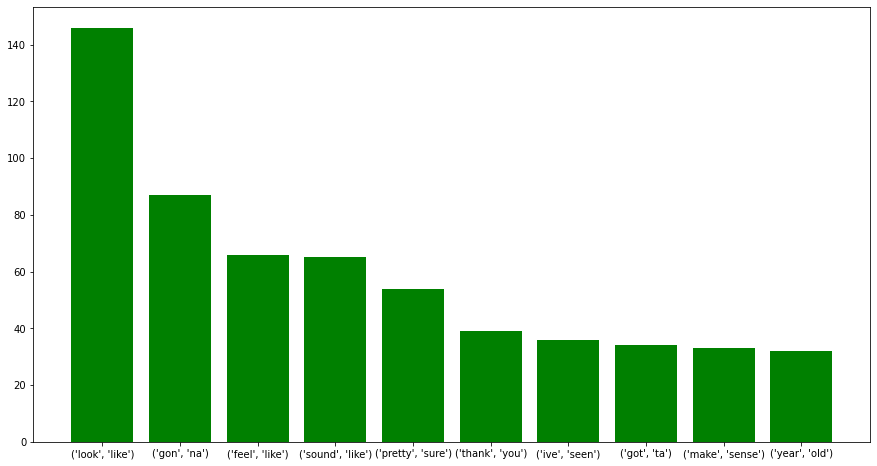

In [114]:
# Gráfico dos bigramas que aparecem com mais frequência na classe 0
q2 = df[zero]
q2 = q2.comment.explode().to_frame()
P2=' '.join([str(w) for w in q2['comment']])
P2 = preprocess(P2)
P2 = word_tokenize(P2)
P2 = list(bigrams(P2))
P2 = FreqDist(P2)

figure(figsize=(15, 8))
x, y = zip(*P2.most_common(n=10))
plt.bar(range(len(x)), y, color='green')
plt.xticks(range(len(x)), x)
plt.show()

## Modelo Baseline

Visando a simplicidade, que é o intuito do modelo Baseline, optei por utilizar apenas o atributo "comment".

In [115]:
X = df['comment']
y = df['label']

Nesta etapa foi realizada a chamada da função "preprocess" para realizar o pré-processamento dos dados. Isso foi feito por meio uma estrutura de repetição que iterou entre todas as palavras do atributo escolhido.

In [116]:
lista = []
for i in X:
    f = preprocess(i)
    lista.append(f)
X_PP = pd.DataFrame (lista, columns = ['comment'])

Realizei a separação do conjunto de dados em dois diferentes conjuntos, o conjunto de treino e o conjunto de teste. Por se tratar de um baseline, o uso de um conjunto de validação não foi necessário.

In [117]:
from sklearn.model_selection import train_test_split
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_PP,y, test_size=0.2, random_state=42, stratify=y)

Por se tratar de comentários feitos em uma rede social, é de se imaginar que no meio desse conjunto de dados existam muitas "gírias" e palavras próprias do vocabulário utilizado na internet, palavras estas que embora possam se repetir muitas vezes no conjunto de dados não agregam muitas informações. Visando o que foi falado, optei por utilizar o método de vetorização "TF-IDF" que coloca a frequência das palavras em uma mesma escala, "penalizando" as que se repetem muitas vezes no conjunto.

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,2))
X_tf = tf.fit_transform(X_train_valid['comment'])
X_test_tf = tf.transform(X_test['comment'])

Logo a baixo pode-se observar uma amostra de 100 palavras que estão contidas no conjunto de dados após todos os procedimentos anteriores. Importante falar que o "TfidfVectorizer" por padrão já realiza algumas etapas de pré-processamento, porém, ele possui algumas falhas nesse aspecto, por exemplo, a remoçao de potuação não eliminou os " _ ". Com isso em mente, antes de realizar a vetorização já realizei meu próprio pré-processamento para evitar dados desnecessários.

In [119]:
c=0
for i in tf.get_feature_names():
    print(i)
    c+=1
    if c == 100:
        break

aaa
aaa game
aaa ideology
aaa platformers
aaa surprised
aaa tpp
aaaaa
aaaaa battery
aaaaaaaaand
aaaaaaaaand shit
aaaaaaaagaaaaaaaaaaaaaaaaaaiiiiiiiiiiiiin
aaaaaaaagaaaaaaaaaaaaaaaaaaiiiiiiiiiiiiin mah
aaaaaaaany
aaaaaaaany social
aaaaaaamnnnnnnnddddd
aaaaaaamnnnnnnnddddd gone
aaaaaaand
aaaaaaand fined
aaaaaand
aaaaaand thats
aaaaaannnddd
aaaaaannnddd want
aaaaall
aaaaand
aaaaand ksp
aaaand
aaaand looking
aaand
aaand retagged
aaargh
aaargh preconceived
aahahahaha
aahahahaha idea
aajkal
aampm
aampm going
aampm like
aampm overtime
aampm prairie
aampm sure
aampm year
aan
aan die
aan hand
aan het
aan vraag
aang
aang katara
aangereden
aangereden het
aap
aap follow
aap nay
aap place
aap wonder
aar
aar cuda
aaron
aaron curry
aaron diaz
aaron hernandez
aaron lmao
aaron rodgers
aav
aav mil
ab
ab allowed
ab ill
ab popular
abaddon
abaddon fall
abandon
abandon account
abandon campaign
abandon lane
abandon ship
abandoned
abandoned father
abandoned hunt
abandoned long
abandoned rise
abandoned wife
ab

Como modelo de classificação, optei pela Regressão logistica, é um modelo de classificação bem simples e que já havia sido visto durante a mentoria. Esse modelo foi escolhido principalmente pela sua simplicidade e por ser um modelo que, em geral, já é muito utilizado para NLP.

In [120]:
from sklearn.linear_model import LogisticRegression
LRB = LogisticRegression()
LRB.fit(X_tf, y_train_valid)

LogisticRegression()

In [121]:
y_predictB = LRB.predict(X_test_tf)

In [122]:
from sklearn.metrics import f1_score
AB = f1_score(y_test, y_predictB)
print(f'O F1_Score foi de: {round(AB*100, 2)}%')

O F1_Score foi de: 79.6%


## 1° Conjunto de atributos de entrada

No 1° conjunto de atributos, escolhi utilizar o atributo "parent_comment" junto do "comment", pois imaginei que o contexto do comentário poderia ajudar em sua classificação.

In [123]:
X1 = df[['comment', 'parent_comment']]
y = df['label']

Primeiramente, concatenei as duas colunas escolhidas na coluna "conc" para q fosse possível utilizar as duas na vetorização.

In [124]:
X1['conc'] = X1[['comment', 'parent_comment']].agg(' '.join, axis=1)
X1

,comment,parent_comment,conc
0,"Of course, just like 3.2 was the true Messiah.","Is patch 3.3 going to be our savior? Without trying to sound like a broken record and repeating the many point of views of the growing apocalyptic threads on this forum. I was hoping to get the opinions of everyone if they believe patch 3.3 is going to bring back some of the players who have quit in the last patch or two, or does this feel like another cookie cutter patch that wont stop exit of quality population specifically on the North American servers. I ask this in concern that I have made a assertive effort as of late to refill our FC, and one of the strong points of the patch info so far is that they are installing a cross realm raid tool, which seems like it would diminish the need to recruit for a FC. I personally enjoy the aspect of a 10-15 member FC which can grow close and share things in common to the game and outside the game. But with the game seemingly losing subs it has become harder to find people to come together like I had just described and I don't want to put false hope in those who I have recruited so far. Give me some hope!","Of course, just like 3.2 was the true Messiah. Is patch 3.3 going to be our savior? Without trying to sound like a broken record and repeating the many point of views of the growing apocalyptic threads on this forum. I was hoping to get the opinions of everyone if they believe patch 3.3 is going to bring back some of the players who have quit in the last patch or two, or does this feel like another cookie cutter patch that wont stop exit of quality population specifically on the North American servers. I ask this in concern that I have made a assertive effort as of late to refill our FC, and one of the strong points of the patch info so far is that they are installing a cross realm raid tool, which seems like it would diminish the need to recruit for a FC. I personally enjoy the aspect of a 10-15 member FC which can grow close and share things in common to the game and outside the game. But with the game seemingly losing subs it has become harder to find people to come together like I had just described and I don't want to put false hope in those who I have recruited so far. Give me some hope!"
1,"Yeah because Iran was 100% muslim prior to 1979, and still is now.",I suggest you research Iran pre-1979 as well as al-Qatb and the rise of Wahhabism. You are fully entitled to have an opinion and express it (and you do bring up a good point re: rural cobservatism) but you are misinformed.,"Yeah because Iran was 100% muslim prior to 1979, and still is now. I suggest you research Iran pre-1979 as well as al-Qatb and the rise of Wahhabism. You are fully entitled to have an opinion and express it (and you do bring up a good point re: rural cobservatism) but you are misinformed."
2,WELL YOU'RE JUST A BITCH...YOU HAVE TO GO AND POST AND TAKE YOUR DOWNVOTES,"Warriors / Clips game threads literally add zero value to the game experience. Why would I want to see the words flop, flopped and flopper repeated constantly? Thunder / Clips game threads were pretty good during the season. We'll see how the playoff ones are.","WELL YOU'RE JUST A BITCH...YOU HAVE TO GO AND POST AND TAKE YOUR DOWNVOTES Warriors / Clips game threads literally add zero value to the game experience. Why would I want to see the words flop, flopped and flopper repeated constantly? Thunder / Clips game threads were pretty good during the season. We'll see how the playoff ones are."
3,"Yeah, it's dumb to run background checks on potential teachers.","Oh i forgot.., you get to be finger printed when you are hired! Awesome!","Yeah, it's dumb to run background checks on potential teachers. Oh i forgot.., you get to be finger printed when you are hired! Awesome!"
4,"Oh, it's not that bad once you get a handle on the crippling depression and constant tooth grinding.",Haha oh. Definitely not an option than.,"Oh, it's not that bad once you get a handle on th

Realizei os mesmos processos de pré-processamento, separação em conjunto de treino e teste, balanceamento das classes e vetorização já comentados durante o baseline.

In [125]:
lista = []
for i in X1['conc']:
    f = preprocess(i)
    lista.append(f)
X1_PP = pd.DataFrame (lista, columns = ['conc'])

Em todos os modelos foram utilizados GridSearch ou RandomSearch, que já realizam a separação em conjunto de treino e validação, sendo assim, nessa etapa novamente fiz apenas a separação entre treino e teste.

In [126]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X1_PP,y, test_size=0.2, random_state=42, stratify=y)

Utilizei o método "Random Over-Sampling" para realizar o balanceamento das classes, esse método duplica aleatoriamente amostras na classe que possui menos elementos, até que ambas as classes tenham o mesmo tamanho. Optei por utilizar o Over-Sampling pois a tecnica de Under-Sampling pode acabar fazendo com que o conjunto perca algumas informações importantes, e ao fazer testes com este método pude perceber que ele reduziu bastante a acurácia do modelo em questão.

In [127]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_r, y_r = ros.fit_resample(X_train_valid, y_train_valid)

Durante a vetorização, defini para esse conjunto de atributos que gostaria de trabalhar com unigramas e bigramas, para isso alterei o parâmetro "ngram_range" para (1,2). Também defini o parâmetro "min_df" como 2, para ignorar palavras que aparecem em menos de dois documentos.

In [128]:
tf = TfidfVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,2), min_df=2)
X_tf = tf.fit_transform(X_r['conc'])
X_test_tf = tf.transform(X_test['conc'])

### 1° Modelo: Regressão logística

A regressão logística é um modelo probabilístico e foi escolhido pois costuma gerar bons resultados em problemas de classificação binária.

Foi utilizada a técnica GridSearch para otimizar os hiperparâmetros. Os hiperparâmetros otimizados foram:
1. C: Inverso da força de regularização, quanto menor o seu valor, maior a força de regularização.
2. Penalty: Tecnica de regularização que será utilizada.
3. Solver: Algoritmo que será utilizado para o problema da otimização.

In [129]:
from sklearn.model_selection import GridSearchCV

parametersRL = {'C':[1.0, 0.5, 1.5, 2.0],
              'penalty': ['l2', 'none'],
              'solver':['lbfgs', 'saga', 'newton-cg']}

In [130]:
LRB = LogisticRegression()
GLRB = GridSearchCV(LRB, param_grid=parametersRL, refit='f1', return_train_score=False, scoring= 'f1')
GLRB.fit(X_tf, y_r)
GLRB.best_estimator_

LogisticRegression(penalty='none')

In [131]:
y_predict11 = GLRB.predict(X_test_tf)
A11 = f1_score(y_test, y_predict11)
print(f'O F1_Score foi de: {round(A11*100, 2)}%')

O F1_Score foi de: 75.33%


### 2° Modelo: Naive bayes

O segundo modelo escolhido foi o Naive Bayes, ele também é um classificador probabilístico e foi baseado no "Teorema de Bayes".
Esse algoritmo é muito popular em NLP graças a sua simplicidade e rapizes, além disso,  ele costuma apresentar um desempenho melhor do que muitos outros classificadores. 

Esse modelo também foi otimizado utilizando GridSearch, os hiperparâmetros otimizados foram:
1. Alpha: É o "Smoothing parameter" utilizado na equação "Laplace Smoothing" para resolver o problema da probabilidade zero no algoritmo Naive Bayes
2. Fit_prior: Define se o algoritmo deve aprender a "Prior probability"(probabilidade de um evento ocorrer antes de novos dados serem coletados) dos dados.

In [132]:
parametersNB = {'alpha':[1.0, 0.5, 1.5],
              'fit_prior': [True, False]}

In [133]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
GNB = GridSearchCV(NB, param_grid=parametersNB, refit='f1', scoring= 'f1')
GNB.fit(X_tf, y_r)
GNB.best_estimator_

MultinomialNB(alpha=0.5)

In [134]:
y_predict12 = GNB.predict(X_test_tf)
A12 = f1_score(y_test, y_predict12)
print(f'O F1_Score foi de: {round(A12*100, 2)}%')

O F1_Score foi de: 79.73%


In [184]:
from sklearn.metrics import precision_score
P12 = precision_score(y_test, y_predict12)
P12

0.6766320927394753

In [185]:
from sklearn.metrics import recall_score
R12 = recall_score(y_test, y_predict12)
R12

0.970375

### 3° Modelo: SVM

O terceiro modelo escolhido foi o SVM, ele é um algoritmo de classificação supervisionado e que classifica os dados por meio de hiperplanos.

Neste modelo, a maioria dos hiperparâmetros que seriam otimizados se tratavam de números, sendo assim, imaginei que a otimização por meio do método RandomSearch seria mais efetiva para esse problema. Os hiperparâmetros otimizados foram:
1. C: Inverso da força de regularização, quanto menor o seu valor, maior a força de regularização.
2. Kernel: Define qual kernel vai ser utilizado, nesse caso, entre o "rbf" e o "poly"
3. degree: Escolhe o grau da função polinomial, é ignorado a não ser que o kernel "poly" seja escolhido.

In [135]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import random
parametersS = dict(
    C= [random.uniform(1, 2)],
    kernel= ['rbf', 'poly'],
    degree= [sp_randint.rvs(2,5)],
)

In [136]:
from sklearn.svm import SVC
S = SVC(max_iter=3500)
RS = RandomizedSearchCV(S, parametersS, random_state=42, return_train_score=False, scoring= 'f1')
RS.fit(X_tf, y_r)
RS.best_estimator_

SVC(C=1.0444573445190017, degree=2, kernel='poly', max_iter=3500)

In [137]:
y_predict13 = RS.predict(X_test_tf)
A13 = f1_score(y_test, y_predict13)
print(f'O F1_Score foi de: {round(A13*100, 2)}%')

O F1_Score foi de: 71.33%


### 4° Modelo: Passive-Agressive

O 4° modelo escolhido foi o "Passive-Agressive", é um classificador que não foi visto durante a mentoria, e é um dos poucos "Online-learning algorithms". Em algoritmos de aprendizado online, o conjunto de dados é separado em diversas amostras, que são sequencialmente atualizadas no classificador, de forma resumida pode-se dizer que o modelo pega um exemplo de treino, atualiza o classificador, e logo após descarta o exemplo. O algoritmo "Passive-Agressive" possui esse nome pois ele possui duas possibilidades:

1. Passive: A predição da amostra está correta, então não é feita nenhuma alteração no modelo.
2. Agressive: A predição da amostra está incorreta, são feitas alterações no modelo para corrigir o erro.

Esse modelo foi escolhido pois ele é muito utilizado para situações em que existem uma grande quantidade de dados, como é o caso do dataset SARC, que está sendo trabalhado nesse notebook.

A otimização desse modelo também foi realizada pelo método RandomSearch, e os dados otimizados foram:
1. C: Inverso da força de regularização, quanto menor o seu valor, maior a força de regularização.
2. tol: Critério de parada, define que o modelo irá parar quando chegar a um determinado resultado.
3. max_iter: Quantidade de iterações que o modelo realizará nos dados de treino.

In [138]:
from scipy.stats import uniform
parametersPA = dict(
    C= [random.uniform(1, 2)],
    tol= [10**uniform.rvs(loc = -5, scale = 4)],
    max_iter= [sp_randint.rvs(1000, 2000,5)],
)

In [139]:
from sklearn.linear_model import PassiveAggressiveClassifier
PA = PassiveAggressiveClassifier()
RPA = RandomizedSearchCV(PA, parametersPA, random_state=42, return_train_score=False, scoring= 'f1')
RPA.fit(X_tf, y_r)
RPA.best_estimator_

PassiveAggressiveClassifier(C=1.0539962438844133, max_iter=1744,
                            tol=0.0013586962526097887)

In [140]:
y_predict14 = RPA.predict(X_test_tf)
A14 = f1_score(y_test, y_predict14)
print(f'O F1_Score foi de: {round(A14*100, 2)}%')

O F1_Score foi de: 75.22%


### 5° Modelo: Naive Bayes (Sem balanceamento)

Para fins de teste escolhi o meu melhor modelo do 1° conjunto para testar seu resultado sem a etapa do balanceamento das classes, então, logo a baixo refiz a vetorização dos dados.

In [141]:
tf = TfidfVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,2), min_df=2)
X_tf2 = tf.fit_transform(X_train_valid['conc'])
X_test_tf2 = tf.transform(X_test['conc'])

In [142]:
parametersNB = {'alpha':[1.0, 0.5, 1.5],
              'fit_prior': [True, False]}

In [143]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
GNBS = GridSearchCV(NB, param_grid=parametersNB, refit='f1', scoring= 'f1')
GNBS.fit(X_tf2, y_train_valid)
GNBS.best_estimator_

MultinomialNB(alpha=1.5)

Nesse modelo é possível perceber que ao realizar o balanceamento das classes houve uma grande perda no resultado do F1 Score.

In [144]:
y_predict15 = GNBS.predict(X_test_tf2)
A15 = f1_score(y_test, y_predict15)
print(f'O F1_Score foi de: {round(A15*100, 2)}%')

O F1_Score foi de: 80.04%


## 2° Conjunto de atributos de entrada

Para o 2° conjunto, decidi utilizar os mesmos atributos do 1° conjunto, porém, dessa vez utilizando o método de vetorização "Bag of Words". A escolha de manter os mesmos atributos se deu pois possibilitaria uma melhor comparação entre os dois métodos.

In [145]:
from sklearn.feature_extraction.text import CountVectorizer
bw = CountVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,2), min_df=2)
X_bw = bw.fit_transform(X_r['conc'])
X_test_bw = bw.transform(X_test['conc'])

Nos modelos a seguir também optei por manter os mesmos hiperparâmetros que foram utilizados na otimização dos modelos do 1° conjunto, com o intuito de possibilitar uma comparação mais justa entre ambos.

### 1° Modelo: Regressão logística

In [146]:
parametersRL = {'C':[1.0, 0.5, 1.5, 2.0],
              'penalty': ['l2', 'none'],
              'solver':['lbfgs', 'saga', 'newton-cg']}

In [147]:
LRB = LogisticRegression()
GLRB2 = GridSearchCV(LRB, param_grid=parametersRL, refit='f1', return_train_score=False, scoring= 'f1')
GLRB2.fit(X_bw, y_r)
GLRB2.best_estimator_

LogisticRegression(C=2.0)

O primeiro modelo apresentou um bom resultado, pode-se concluir que o modelo de regressão logística se saiu melhor classificando dados vetorizados pelo "Bag of Words", pois apresentou um F1 Score consideravelmente maior.

In [148]:
y_predict21 = GLRB2.predict(X_test_bw)
A21 = f1_score(y_test, y_predict21)
print(f'O F1_Score foi de: {round(A21*100, 2)}%')

O F1_Score foi de: 76.52%


### 2° Modelo: Naive bayes

In [149]:
parametersNB = {'alpha':[1.0, 0.5, 1.5],
              'fit_prior': [True, False]}

In [150]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
GNB2 = GridSearchCV(NB, param_grid=parametersNB, refit='f1', scoring= 'f1')
GNB2.fit(X_bw, y_r)
GNB2.best_estimator_

MultinomialNB(alpha=0.5)

O modelo utilizando Naive bayes, por outro lado, apresentou uma pequena queda em seu F1 Score indicando que este modelo se saiu melhor nos dados vetorizado com o método TF-IDF

In [151]:
y_predict22 = GNB2.predict(X_test_bw)
A22 = f1_score(y_test, y_predict22)
print(f'O F1_Score foi de: {round(A22*100, 2)}%')

O F1_Score foi de: 79.4%


### 3° Modelo: SVM

In [152]:
parametersS = dict(
    C= [random.uniform(1, 2)],
    kernel= ['rbf', 'poly'],
    degree= [sp_randint.rvs(2,5)],
)

In [153]:
S = SVC(max_iter=3500)
RS2 = RandomizedSearchCV(S, parametersS, random_state=42, return_train_score=False, scoring= 'f1')
RS2.fit(X_bw, y_r)
RS2.best_estimator_

SVC(C=1.880181991732179, degree=4, max_iter=3500)

O modelo utilizando SVM foi o mais impactado pela mudança no método de vetorização, no 1° conjunto ele foi um dos piores modelos em termos de F1 Score, porém, no segundo conjunto este modelo foi o que apresentou o maior F1 Score.

In [154]:
y_predict23 = RS2.predict(X_test_bw)
A23 = f1_score(y_test, y_predict23)
print(f'O F1_Score foi de: {round(A23*100, 2)}%')

O F1_Score foi de: 79.59%


### 4° Modelo: Passive-Agressive

In [155]:
parametersPA = dict(
    C= [random.uniform(1, 2)],
    tol= [10**uniform.rvs(loc = -5, scale = 4)],
    max_iter= [sp_randint.rvs(1000, 2000,5)],
)

In [156]:
PA = PassiveAggressiveClassifier()
RPA2 = RandomizedSearchCV(PA, parametersPA, random_state=42, return_train_score=False, scoring= 'f1')
RPA2.fit(X_bw, y_r)
RPA2.best_estimator_

PassiveAggressiveClassifier(C=1.8676108062263965, max_iter=1130,
                            tol=4.612123909000647e-05)

O modelo utilizando o método Passive-Agressive não foi muito impactado pela troca do método de vetorização, não apresentando mudança relevante em seu F1 Score

In [157]:
y_predict24 = RPA2.predict(X_test_bw)
A24 = f1_score(y_test, y_predict24)
print(f'O F1_Score foi de: {round(A24*100, 2)}%')

O F1_Score foi de: 73.96%


### 5° Modelo: SVM (Sem balanceamento)

No 2° conjunto o melhor modelo foi o SVM, então, fiz o mesmo teste realizado no 1° conjunto para ver como este modelo era afetado pelo balanceamento das classes.

In [158]:
from sklearn.feature_extraction.text import CountVectorizer
bw = CountVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,2), min_df=2)
X_bw2 = bw.fit_transform(X_train_valid['conc'])
X_test_bw2 = bw.transform(X_test['conc'])

In [159]:
parametersS = dict(
    C= [random.uniform(1, 2)],
    kernel= ['rbf', 'poly'],
    degree= [sp_randint.rvs(2,5)],
)

In [160]:
S = SVC(max_iter=3500)
RSS2 = RandomizedSearchCV(S, parametersS, random_state=42, return_train_score=False, scoring= 'f1')
RSS2.fit(X_bw2, y_train_valid)
RSS2.best_estimator_

SVC(C=1.5678855260387885, kernel='poly', max_iter=3500)

Novamente, o modelo desbalanceado apresentou uma grande melhora em relação ao modelo com balanceamento.

In [161]:
y_predict25 = RSS2.predict(X_test_bw2)
A25 = f1_score(y_test, y_predict25)
print(f'O F1_Score foi de: {round(A23*100, 2)}%')

O F1_Score foi de: 79.59%


## Análise de resultados

Segue a baixo um gráfico com todos os resultados obtidos, pode-se perceber que alguns modelos se saíram melhor dependendo do método de vetorização que estava sendo utilizado, também é possível notar que os modelos desbalanceados apresentaram um melhor resultado em relação aos modelos balanceados.

In [162]:
data = {'Conjunto': ['1° Conjunto', '1° Conjunto', '1° Conjunto', '1° Conjunto', '1° Conjunto', '2° Conjunto', '2° Conjunto', '2° Conjunto', '2° Conjunto', '2° Conjunto', ],
        'Modelo': ['Regressão Logística', 'Naive Bayes', 'SVM', 'Passive-Agressive', 'Naive Bayes(Desbalanceado)', 'Regressão Logística', 'Naive Bayes', 'SVM', 'Passive-Agressive', 'SVM(Desbalanceado)'],
        'F1_Score(%)': [round(A11*100, 2), round(A12*100, 2), round(A13*100, 2), round(A14*100, 2), round(A15*100, 2), round(A21*100, 2), round(A22*100, 2), round(A23*100, 2), round(A24*100, 2), round(A25*100, 2)],
        }
tabela = pd.DataFrame(data)
tabela

,Conjunto,Modelo,F1_Score(%)
0,1° Conjunto,Regressão Logística,75.33
1,1° Conjunto,Naive Bayes,79.73
2,1° Conjunto,SVM,71.33
3,1° Conjunto,Passive-Agressive,75.22
4,1° Conjunto,Naive Bayes(Desbalanceado),80.04
5,2° Conjunto,Regressão Logística,76.52
6,2° Conjunto,Naive Bayes,79.40
7,2° Conjunto,SVM,79.59
8,2° Conjunto,Passive-Agressive,73.96
9,2° Conjunto,SVM(Desbalanceado),79.93


No geral, o modelo que apresentou o melhor resultado foi o Naive bayes desbalanceado, então, utilizei a predição desse modelo para montar uma matriz de confusão e avaliar melhor os erros que aconteceram durante a classificação. Além disso, também montei uma matriz de confusão utilizando a predição do modelo Naive bayes balanceado do primeiro conjunto, para comparar como o balanceamento impactava no resultado.

In [176]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
CM = confusion_matrix(y_test,y_predict15, labels= GNBS.classes_)
CM1 = confusion_matrix(y_test,y_predict12, labels= GNB.classes_)

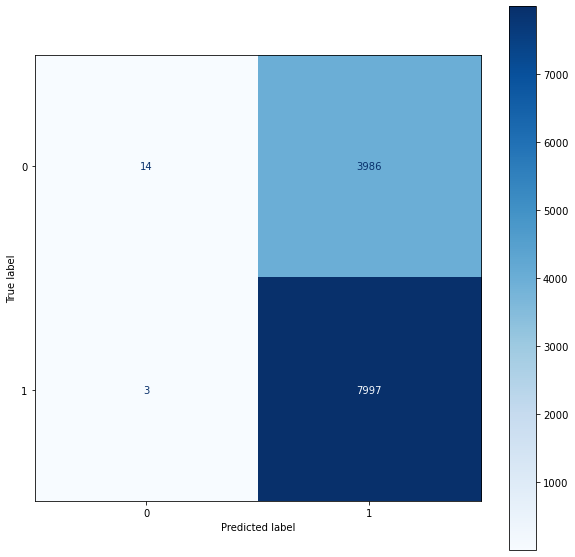

In [177]:
disp = ConfusionMatrixDisplay(confusion_matrix= CM, display_labels=GNBS.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax= ax)
plt.show()

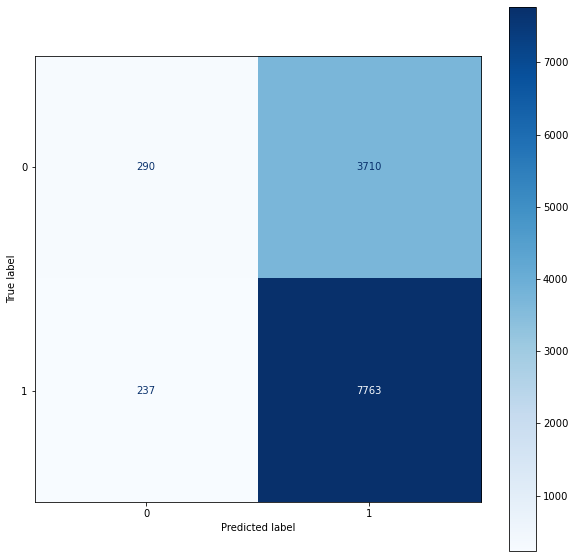

In [178]:
disp = ConfusionMatrixDisplay(confusion_matrix= CM1, display_labels=GNBS.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax= ax)
plt.show()

Considerando a classe 1 como "positiva" e a classe 0 como "negativa", pode-se perceber que o modelo desbalanceado, embora tenha conseguido acertar mais verdadeiros positivos, apenas detectou 14 verdadeiros negativos, ou seja, esse modelo detectou praticamente todos os dados como sarcásticos até mesmo os não sarcásticos. Por outro lado, o modelo balanceado que apresentou um F1 Score levemente menor, conseguiu detectar um número muito maior de verdadeiros negativos quando comparado com o modelo desbalanceado, mas em troca ele também apresentou um número maior de falsos negativos e menor de verdadeiros positivos.